In [1]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


In [2]:
from analysis import InterdigitationAnalysis,  Membrane_overlap_distance, MicAnalysis, OverlapAnalysis

Analysis module loaded


In [3]:
def loader(topology_path, trajectory_path):
    u = mda.Universe(topology_path, trajectory_path)
    return u

In [41]:
u1 = loader('trajs/gro.gro', 'trajs/c36_skip100.xtc')
u2 = loader('trajs/gro.gro', 'trajs/c36c_skip100.xtc')
u3 = loader('trajs/ld.psf', 'trajs/drude_skip100.dcd')

In [5]:
def manager(u, start_frame=0, end_frame=None, method='all',
            atom_name='C316', lipid_1='POPC', lipid_2='DOPE', 
            lipid_3='SAPI', neutral_lipid='TRIO'):
    
    instance = Membrane_overlap_distance(u, start_frame, end_frame)
    instance.setup_groups(atom_name, lipid_1, lipid_2, lipid_3, neutral_lipid)
    results = instance.analyze_trajectory(method)
    df = instance.analysis_to_df(results)
    
    analysis = OverlapAnalysis(df, method='all')
    analysis.print_analysis()
    overlap_overtime = analysis.calculate_average_overlap_depth()
    overlap_average = analysis.calculate_average_depth_overall()
    overlap_number = analysis.calculate_number_of_overlaps_per_frame()

    return df, overlap_overtime, overlap_number


In [6]:
df_c36, overlap_overtime_c36, overlap_number_c36  = manager(u1, start_frame=50, end_frame=None, method='all',
                                    atom_name='C316', lipid_1='POPC', lipid_2='DOPE', 
                                    lipid_3='SAPI', neutral_lipid='TRIO')

Overall Average Overlap Depth: 4.2583385


In [7]:
df_c36c, overlap_overtime_c36c, overlap_number_c36c  = manager(u2, start_frame=50, end_frame=None, method='all',
                                    atom_name='C316', lipid_1='POPC', lipid_2='DOPE', 
                                    lipid_3='SAPI', neutral_lipid='TRIO')

Overall Average Overlap Depth: 4.4319696


In [8]:
df_drude, overlap_overtime_drude, overlap_number_drude  = manager(u3, start_frame=470, end_frame=None, method='all',
                                    atom_name='C316', lipid_1='POPC', lipid_2='DOPE', 
                                    lipid_3='SAPI', neutral_lipid='TRIO')

Overall Average Overlap Depth: 4.128063


In [17]:
total_phospholipids = 270
mic_analysis = MicAnalysis(lipid1='POPC', lipid2='DOPE', atom1='P', atom2='C316')
mic_c36 = mic_analysis.calculate_mic_analysis(u1, overlap_overtime_c36, overlap_number_c36, total_phospholipids, startframe=50, endframe=None)
mic_c36c = mic_analysis.calculate_mic_analysis(u2, overlap_overtime_c36c, overlap_number_c36c, total_phospholipids, startframe=50, endframe=None)
mic_drude = mic_analysis.calculate_mic_analysis(u3, overlap_overtime_drude, overlap_number_drude, total_phospholipids, startframe=470, endframe=None)

In [18]:
def print_stats(df, description):
    print(f"Statistics for {description}:")
    metrics = ['Average_Overlap_Depth', 'Number_of_Overlaps', 'tpf', 'MIC']
    for metric in metrics:
        mean = df[metric].mean()
        std = df[metric].std()
        print(f"{metric} - Mean: {mean:.4f}, Std Dev: {std:.4f}")
    print("\n")

# Example use:
# Assuming mic_c36, mic_c36c, mic_drude are already defined and populated with your data
print_stats(mic_c36, "MIC C36")
print_stats(mic_c36c, "MIC C36C")
print_stats(mic_drude, "MIC Drude")


Statistics for MIC C36:
Average_Overlap_Depth - Mean: 4.2619, Std Dev: 0.3705
Number_of_Overlaps - Mean: 94.7119, Std Dev: 8.2128
tpf - Mean: 18.5625, Std Dev: 0.9053
MIC - Mean: 8.0554, Std Dev: 0.9265


Statistics for MIC C36C:
Average_Overlap_Depth - Mean: 4.4311, Std Dev: 0.3883
Number_of_Overlaps - Mean: 88.4839, Std Dev: 6.1103
tpf - Mean: 17.7597, Std Dev: 0.2635
MIC - Mean: 8.1785, Std Dev: 0.9222


Statistics for MIC Drude:
Average_Overlap_Depth - Mean: 4.1380, Std Dev: 0.2889
Number_of_Overlaps - Mean: 83.9756, Std Dev: 5.5294
tpf - Mean: 16.8599, Std Dev: 0.1177
MIC - Mean: 7.6143, Std Dev: 0.4801




In [19]:
def plot_mic_over_time(df, time_col, mic_col, title='MIC Over Time', xlabel='Time', ylabel='MIC Value', save_path=None):

    plt.figure(figsize=(10, 5))  # Set the figure size
    plt.plot(df[time_col], df[mic_col], label='MIC', marker='o')  # Plot MIC over time with markers
    plt.title(title)  # Set the title of the plot
    plt.xlabel(xlabel)  # Set the x-axis label
    plt.ylabel(ylabel)  # Set the y-axis label
    plt.ylim(0,20)
    plt.legend()  # Show legend
    if save_path:
        plt.savefig(save_path)  # Save the plot if a path is provided
    plt.show()  # Display the plot



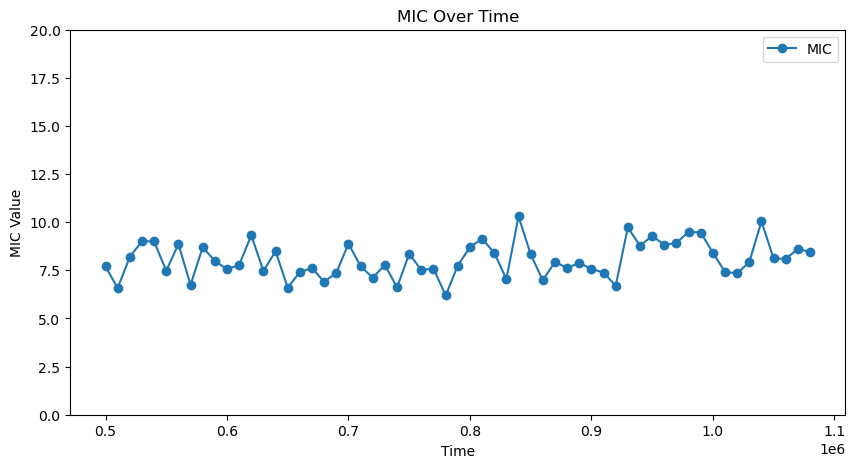

In [20]:
plot_mic_over_time(mic_c36, 'Time', 'MIC', save_path=None)


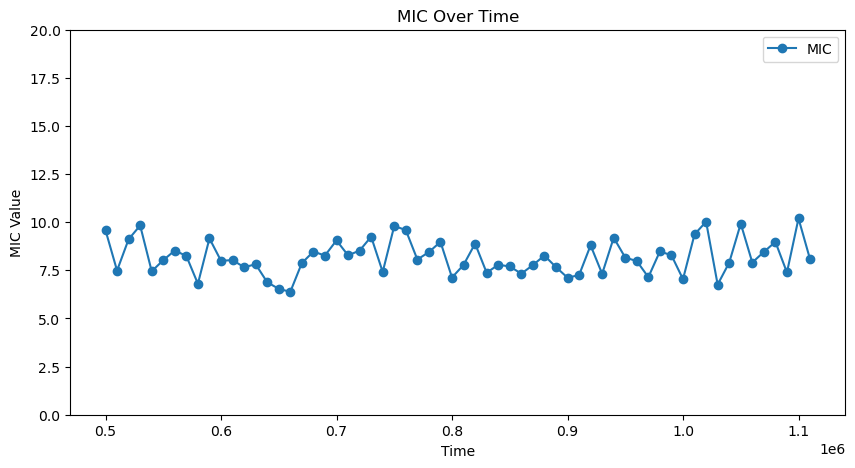

In [21]:
plot_mic_over_time(mic_c36c, 'Time', 'MIC', save_path=None)


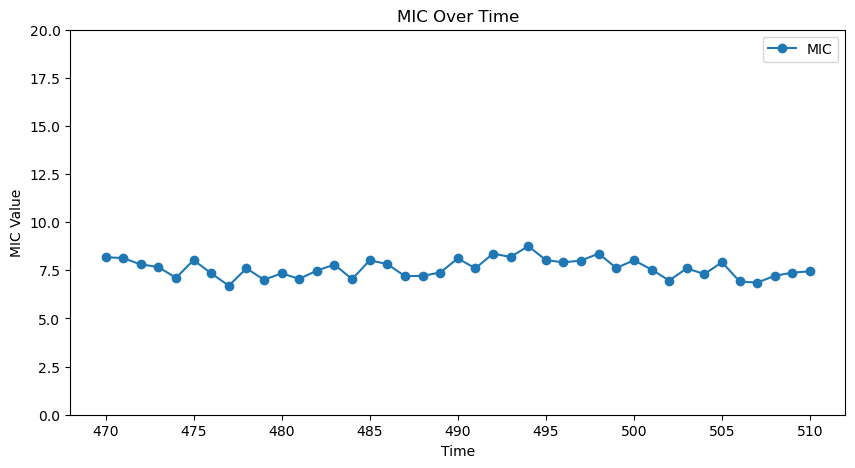

In [22]:
plot_mic_over_time(mic_drude, 'Time', 'MIC', save_path=None)


# Interdigitation, overlap, densities

In [5]:
analysis = InterdigitationAnalysis('trajs/gro.gro', 'trajs/c36_skip100.xtc', ['POPC', 'DOPE', 'SAPI'], 'TRIO',  'TIP3')
results_c36 = analysis.interdigit(nbins=100, b=0, e=None)

analyzing 0 us.... 
analyzing 1 us.... 
units: Z (nm), interdigitation (nm), time (ns), density (g/m3)


In [6]:
analysis_c36c = InterdigitationAnalysis('trajs/gro.gro', 'trajs/c36c_skip100.xtc', ['POPC', 'DOPE', 'SAPI'], 'TRIO',  'TIP3')
results_c36c = analysis_c36c.interdigit(nbins=100, b=0, e=None)

analyzing 0 us.... 
analyzing 1 us.... 
units: Z (nm), interdigitation (nm), time (ns), density (g/m3)


In [45]:
analysis_drude = InterdigitationAnalysis('trajs/ld.psf', 'trajs/drude_skip100.dcd', ['POPC', 'DOPE'], 'TRIO',  'SWM4')
results_drude = analysis_drude.interdigit(nbins=100, b=0, e=None)

analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 


analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 
analyzing 0 us.... 


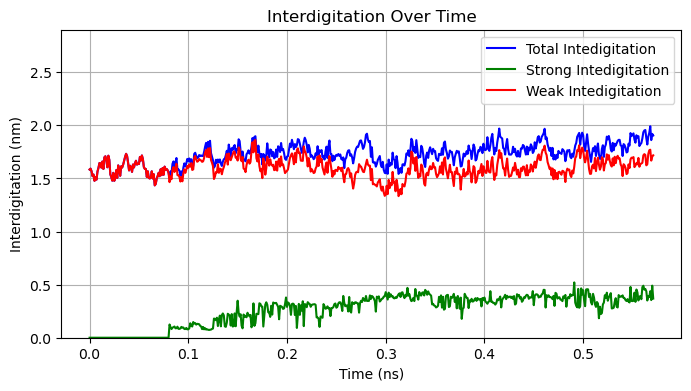

In [46]:

def plot_interdigitation_over_time(results):
    # Extract data for plotting
    total_interdigitation = results['inter']['total']
    strong_interdigitation = results['inter']['strong']
    weak_interdigitation = results['inter']['weak']

    # Extract time and interdigitation values
    time_total, inter_total = total_interdigitation[:, 0], total_interdigitation[:, 1]
    time_strong, inter_strong = strong_interdigitation[:, 0], strong_interdigitation[:, 1]
    time_weak, inter_weak = weak_interdigitation[:, 0], weak_interdigitation[:, 1]

    # Create the plot
    plt.figure(figsize=(8, 4))
    plt.plot(time_total, inter_total, label='Total Intedigitation', color='blue')
    plt.plot(time_strong, inter_strong, label='Strong Intedigitation', color='green')
    plt.plot(time_weak, inter_weak, label='Weak Intedigitation', color='red')

    plt.title('Interdigitation Over Time')
    plt.xlabel('Time (ns)')
    plt.ylabel('Interdigitation (nm)')
    plt.ylim(0, 2.9)
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming 'results' is your data dictionary loaded as per your simulation outputs
plot_interdigitation_over_time(results_drude)


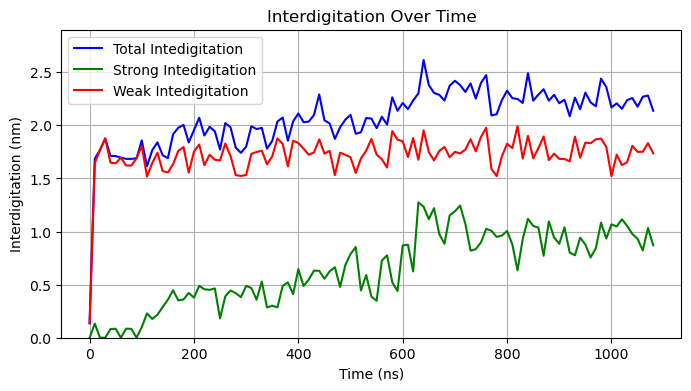

In [47]:
plot_interdigitation_over_time(results_c36)

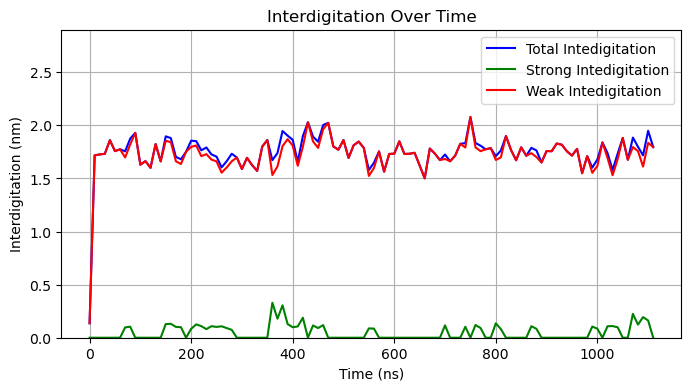

In [10]:
plot_interdigitation_over_time(results_c36c)

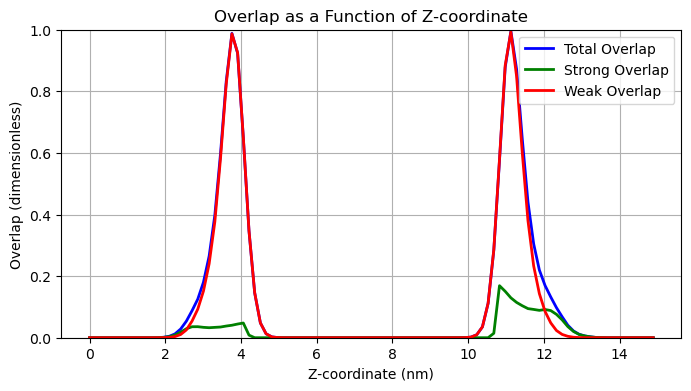

In [48]:
def plot_overlap(results):
    # Extract data for plotting
    total_overlap = results['ov']['total']
    strong_overlap = results['ov']['strong']
    weak_overlap = results['ov']['weak']

    # Extract z-coordinates and overlap values
    z_coords, ov_total = total_overlap[:, 0], total_overlap[:, 1]
    _, ov_strong = strong_overlap[:, 0], strong_overlap[:, 1]
    _, ov_weak = weak_overlap[:, 0], weak_overlap[:, 1]

    # Create the plot
    plt.figure(figsize=(8, 4))
    plt.plot(z_coords, ov_total, label='Total Overlap', color='blue', linewidth=2)
    plt.plot(z_coords, ov_strong, label='Strong Overlap', color='green', linewidth=2)
    plt.plot(z_coords, ov_weak, label='Weak Overlap', color='red', linewidth=2)

    plt.title('Overlap as a Function of Z-coordinate')
    plt.xlabel('Z-coordinate (nm)')
    plt.ylabel('Overlap (dimensionless)')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming 'results' is your data dictionary loaded as per your simulation outputs
plot_overlap(results_drude)

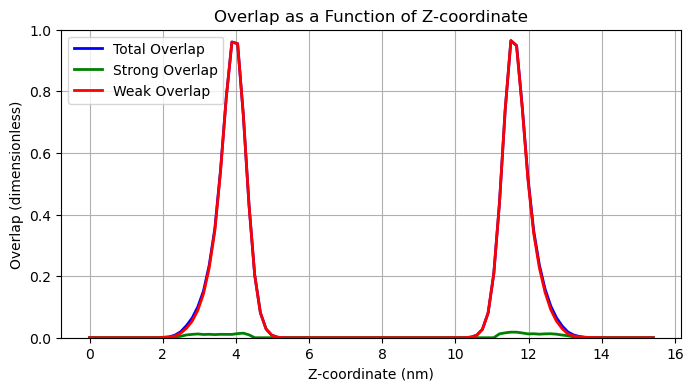

In [12]:
plot_overlap(results_c36c)

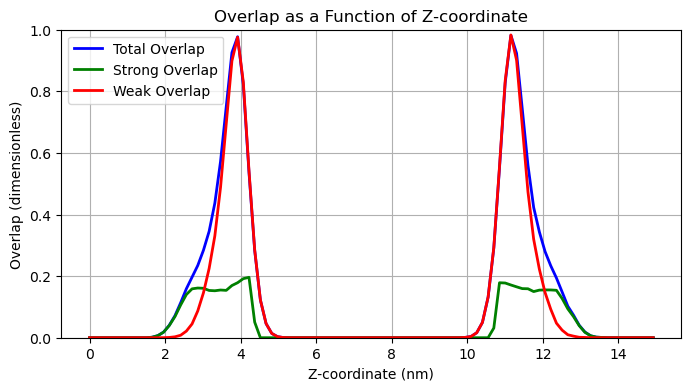

In [13]:
plot_overlap(results_c36)

In [50]:
def plot_densities(results):
    # Extract density data
    pl_density = results['density']['PL']
    trio_density = results['density']['TRIO']
    surf_trio_density = results['density']['SURF-TRIO']
    core_trio_density = results['density']['CORE-TRIO']
    water_density = results['density']['water']

    # Extract z-coordinates and density values
    z_coords, den_pl = pl_density[:, 0], pl_density[:, 1]
    _, den_trio = trio_density[:, 0], trio_density[:, 1]
    _, den_surf_trio = surf_trio_density[:, 0], surf_trio_density[:, 1]
    _, den_core_trio = core_trio_density[:, 0], core_trio_density[:, 1]
    _, den_water = water_density[:, 0], water_density[:, 1]

    # Create the plot
    plt.figure(figsize=(8, 4))
    plt.plot(z_coords, den_pl, label='PL Density', color='blue', linewidth=2)
    plt.plot(z_coords, den_trio, label='TRIO Density', color='green', linewidth=2)
    plt.plot(z_coords, den_surf_trio, label='SURF-TRIO Density', color='red', linewidth=2)
    plt.plot(z_coords, den_core_trio, label='CORE-TRIO Density', color='purple', linewidth=2)
    plt.plot(z_coords, den_water, label='Water Density', color='cyan', linewidth=2)
    plt.ylim(0,0.02)

    plt.title('Density Profiles Along Z-Coordinate')
    plt.xlabel('Z-coordinate (nm)')
    plt.ylabel('Density (g/m³)')
    plt.legend()
    plt.grid(True)
    plt.show()


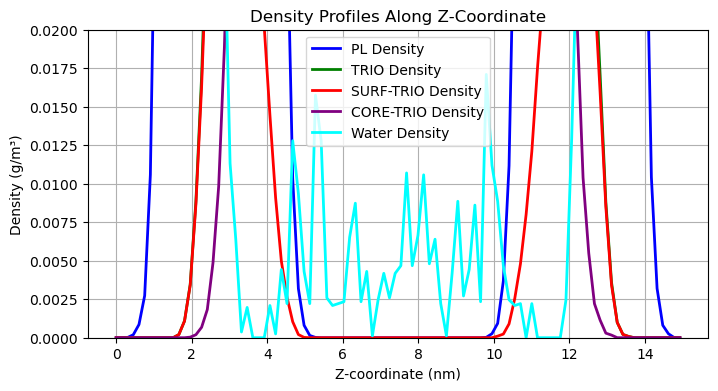

In [51]:

# Assuming 'results' is your data dictionary loaded as per your simulation outputs
plot_densities(results_c36)

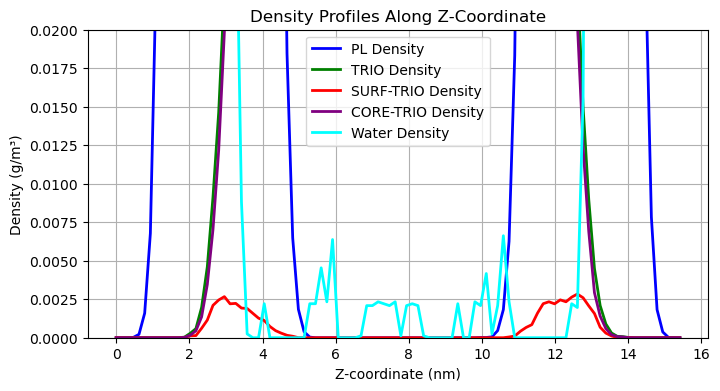

In [52]:
plot_densities(results_c36c)

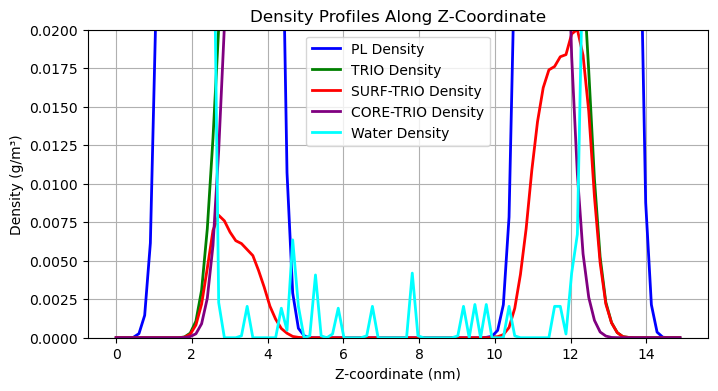

In [53]:
plot_densities(results_drude)

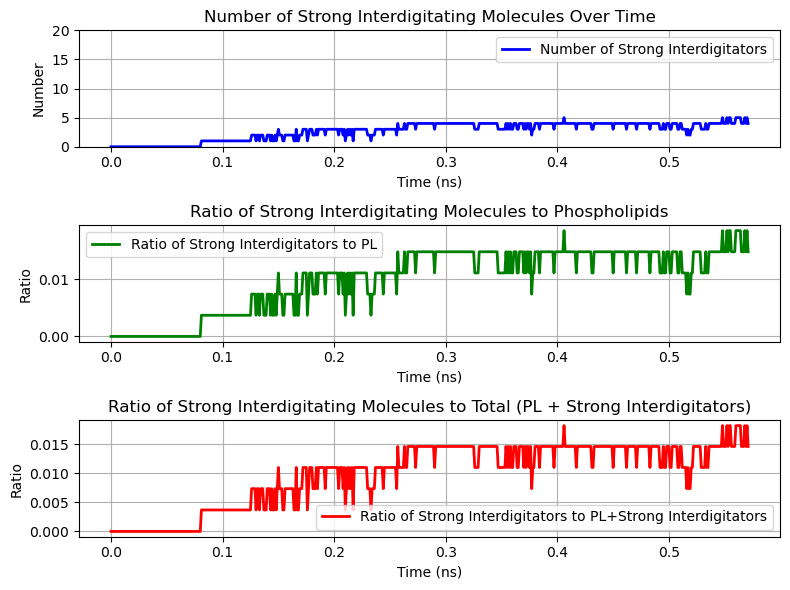

In [74]:
def plot_ratios(results):
    # Extract data for plotting
    num_ratio = results['ratio']['num']          # Number of strong interdigitating molecules over time
    trio_to_pl_ratio = results['ratio']['trio-to-pl']  # Ratio of strong interdigitating molecules to phospholipids
    trio_to_pl_trio_ratio = results['ratio']['trio-to-pl+trio']  # Ratio of strong interdigitating molecules to the sum of phospholipids and strong interdigitating molecules

    # Extract time and ratio values
    time_num, ratio_num = num_ratio[:, 0], num_ratio[:, 1]
    time_trio_to_pl, ratio_trio_to_pl = trio_to_pl_ratio[:, 0], trio_to_pl_ratio[:, 1]
    time_trio_to_pl_trio, ratio_trio_to_pl_trio = trio_to_pl_trio_ratio[:, 0], trio_to_pl_trio_ratio[:, 1]

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.subplot(311)  # 3 rows, 1 column, 1st subplot
    plt.plot(time_num, ratio_num, label='Number of Strong Interdigitators', color='blue', linewidth=2)
    plt.title('Number of Strong Interdigitating Molecules Over Time')
    plt.xlabel('Time (ns)')
    plt.ylabel('Number')
    plt.ylim(0,20)
    plt.legend()
    plt.grid(True)

    plt.subplot(312)  # 3 rows, 1 column, 2nd subplot
    plt.plot(time_trio_to_pl, ratio_trio_to_pl, label='Ratio of Strong Interdigitators to PL', color='green', linewidth=2)
    plt.title('Ratio of Strong Interdigitating Molecules to Phospholipids')
    plt.xlabel('Time (ns)')
    plt.ylabel('Ratio')
    plt.legend()
    plt.grid(True)

    plt.subplot(313)  # 3 rows, 1 column, 3rd subplot
    plt.plot(time_trio_to_pl_trio, ratio_trio_to_pl_trio, label='Ratio of Strong Interdigitators to PL+Strong Interdigitators', color='red', linewidth=2)
    plt.title('Ratio of Strong Interdigitating Molecules to Total (PL + Strong Interdigitators)')
    plt.xlabel('Time (ns)')
    plt.ylabel('Ratio')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.show()

# Assuming 'results' is your data dictionary loaded as per your simulation outputs
plot_ratios(results_drude)

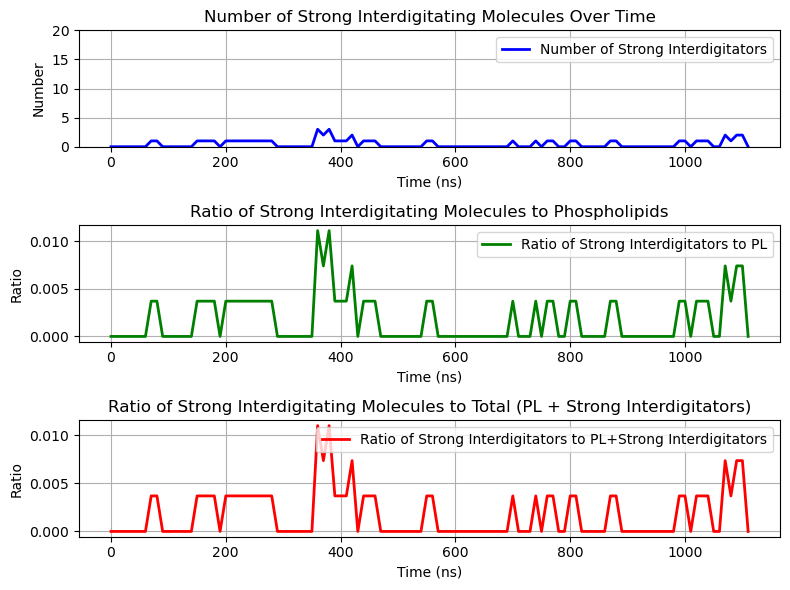

In [75]:
plot_ratios(results_c36c)

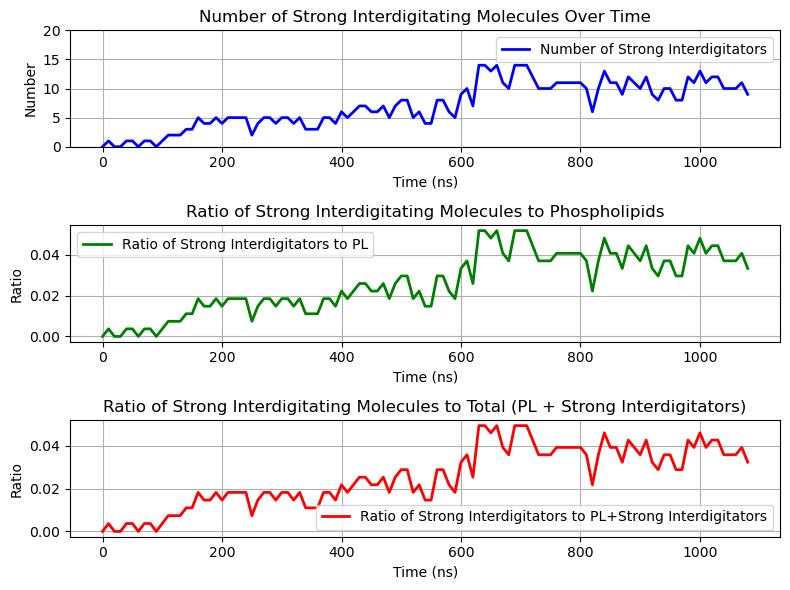

In [76]:
plot_ratios(results_c36)

# Develop method for new interdigitation

In [55]:

def percent_overlap(results, type1_name, type2_name):
    # Retrieve density arrays from the results using the provided names
    type_density_1 = results['density'][type1_name]
    type_density_2 = results['density'][type2_name]
    z = type_density_1[:, 0]
    if type_density_1.shape != type_density_2.shape:
        raise ValueError("The two density arrays must have the same shape.")
    overlap_density = np.minimum(type_density_1[:, 1], type_density_2[:, 1])
    total_area = np.trapz(type_density_1[:, 1], x=z)
    overlap_area = np.trapz(overlap_density, x=z)
    overlap_percentage = (overlap_area / total_area) * 100
    print(f"The overlap of {type2_name} with {type1_name} represents {overlap_percentage:.2f}% of the total {type1_name} area.")
    return(overlap_percentage)


In [56]:
def percent_overlap_time_series(results, type1_name, type2_name):
    # Retrieve time-series density arrays from the results
    type_series_1 = results['density'][f'{type1_name}_series']
    type_series_2 = results['density'][f'{type2_name}_series']
    times = results['inter']['total'][:, 0]  # Assuming this time array is appropriate for both densities
    z = results['density'][type1_name][:, 0]  # Assuming the z-axis values are the same for both densities
    if type_series_1.shape != type_series_2.shape:
        raise ValueError("The two time-series density arrays must have the same shape.")
    overlap_percentages = []
    for t in range(len(times)):
        overlap_density = np.minimum(type_series_1[t], type_series_2[t])
        total_area = np.trapz(type_series_1[t], x=z)
        overlap_area = np.trapz(overlap_density, x=z)
        overlap_percentage = (overlap_area / total_area) * 100
        overlap_percentages.append(overlap_percentage)
    overlap_percentages = np.array(overlap_percentages)
    for time, overlap in zip(times, overlap_percentages):
        print(f"At time {time} ns, the overlap of {type2_name} with {type1_name} is {overlap:.2f}%.")

    return times, overlap_percentages


In [77]:
# Assuming `results_c36` is your results dictionary containing the time-series densities
times, overlap_evolution = percent_overlap_time_series(results_drude, 'PL', 'CORE-TRIO')


At time 0.0 ns, the overlap of CORE-TRIO with PL is 11.13%.
At time 0.0010000000328495406 ns, the overlap of CORE-TRIO with PL is 11.29%.
At time 0.002000000065699081 ns, the overlap of CORE-TRIO with PL is 10.92%.
At time 0.0030000000985486216 ns, the overlap of CORE-TRIO with PL is 10.56%.
At time 0.004000000131398162 ns, the overlap of CORE-TRIO with PL is 10.77%.
At time 0.005000000164247703 ns, the overlap of CORE-TRIO with PL is 10.19%.
At time 0.006000000197097243 ns, the overlap of CORE-TRIO with PL is 10.90%.
At time 0.007000000229946784 ns, the overlap of CORE-TRIO with PL is 10.09%.
At time 0.008000000262796325 ns, the overlap of CORE-TRIO with PL is 11.01%.
At time 0.009000000295645865 ns, the overlap of CORE-TRIO with PL is 11.08%.
At time 0.010000000328495406 ns, the overlap of CORE-TRIO with PL is 11.69%.
At time 0.011000000361344946 ns, the overlap of CORE-TRIO with PL is 11.52%.
At time 0.012000000394194486 ns, the overlap of CORE-TRIO with PL is 11.56%.
At time 0.0130

In [132]:
def plot_overlap_evolution(times, overlap_evolution):
    plt.rc('font', size=12, weight='bold')
    plt.rc('axes', titlesize=14, labelsize=12, titleweight='bold')
    plt.rc('legend', fontsize=10)

    # Create the plot
    plt.figure(figsize=(6, 4))
    plt.plot(times, overlap_evolution, marker='o', markersize=3, linewidth=2.5, label='Overlap Evolution')
    plt.title('Overlap Percentage Over Time')
    plt.xlabel('Time (ns)')
    plt.ylabel('Overlap Percentage (%)')
    plt.ylim(0, 15)
    plt.grid(True)
    plt.show()


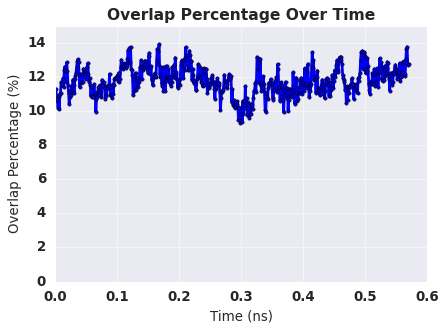

In [133]:
plot_overlap_evolution(times, overlap_evolution)

In [86]:
percent_overlap(results_drude, 'PL', 'SURF-TRIO')


The overlap of SURF-TRIO with PL represents 1.18% of the total PL area.


1.1805354907013377

In [121]:
import matplotlib.pyplot as plt
import numpy as np

def plot_ov(results, type_1_name, type_2_name):
    # Retrieve density data from the results
    type_1 = results['density'][type_1_name]
    type_2 = results['density'][type_2_name]
    z = type_1[:, 0]  # Adjust the 'end' and 'num' based on your data specifics

    # Set font properties globally
    plt.rc('font', size=12, weight='bold')  # Increase font size and weight
    plt.rc('axes', titlesize=14, labelsize=12, titleweight='bold')
    plt.rc('legend', fontsize=10)

    # Create the plot
    plt.figure(figsize=(6, 3))  # Larger figure for more space around legend
    plt.plot(z, type_1[:, 1], label=f'{type_1_name} Density', color='blue', linewidth=3.5)
    plt.plot(z, type_2[:, 1], label=f'{type_2_name} Density', color='red', linewidth=3.5)
    plt.fill_between(z, 0, np.minimum(type_1[:, 1], type_2[:, 1]), color='purple', alpha=0.8, label='Overlap Region')
    plt.title('Density Distribution with Overlap (C36)')
    plt.xlabel('Depth (z)')
    plt.ylabel('Density')

    # Position legend outside of the plot
#     plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#     plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the plot to fit the legend
    plt.grid(True)
    plt.show()


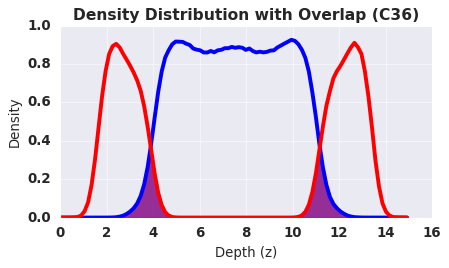

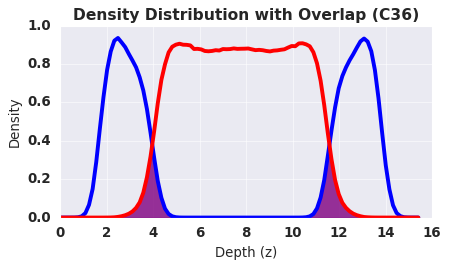

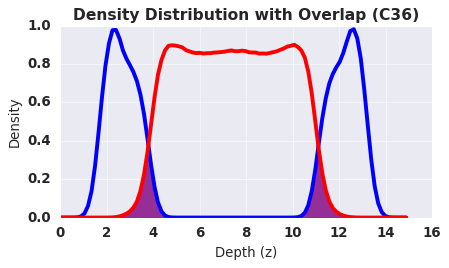

In [124]:
plot_ov(results_c36, 'CORE-TRIO', 'PL')
plot_ov(results_c36c, 'PL', 'CORE-TRIO')
plot_ov(results_drude, 'PL', 'CORE-TRIO')

In [171]:

# z = np.linspace(0, 100, num=len(pl_density[:, 1]))
z = pl_density[:,0] 
area_under_curve = np.trapz(pl_density[:, 1], x=z)

In [180]:
# Minimum of PL and TG densities at each point along the z-axis
overlap_density = np.minimum(pl_density[:, 1], surf_density[:, 1])
overlap_area = np.trapz(overlap_density, x=z)
total_pl_area = np.trapz(pl_density[:, 1], x=z)
overlap_percentage = (overlap_area / total_pl_area) * 100
print(f"The overlap of TG with PL represents {overlap_percentage:.2f}% of the total PL area.")

The overlap of TG with PL represents 8.38% of the total PL area.
